<a href="https://colab.research.google.com/github/omsharma-001/NLP_Models/blob/main/SkimLit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 6.97 MiB/s, done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split)-1
        abstract_samples.append(line_data)

    else:
      abstract_lines += line

  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir+"test.txt")

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)


In [ ]:
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels = label_encoder.fit_transform(val_df["target"].to_numpy())
test_labels = label_encoder.fit_transform(test_df["target"].to_numpy())

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X = train_sentences, y = train_labels)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-15 11:44:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-15 11:44:03 (97.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
baseline_results = calculate_results(model_0.predict(val_sentences), val_labels )

In [ ]:
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7835634520695112,
 'recall': 0.7218323844829869,
 'f1': 0.7447397336209445}

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
max_tokens = 68000

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens, output_sequence_length = 55, )

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
tokens_embed = layers.Embedding(input_dim = len(text_vectorizer.get_vocabulary()), output_dim =128, mask_zero = True, input_length = 55)

In [ ]:
train_datasets = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_datasets = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_datasets = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [ ]:
train_dataset = train_datasets.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_datasets.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_datasets.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embedding =   tokens_embed(text_vectors)
x = layers.Conv1D(64, 5, activation = "relu", padding = "same")(token_embedding)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.0003), metrics = ["accuracy"])

In [ ]:
history_1 = model_1.fit(train_dataset, steps_per_epoch = int(0.1*len(train_dataset)), epochs = 3, validation_data = val_dataset, validation_steps =int(0.1*len(train_dataset)) )

Epoch 1/3
562/562 [==============================] - 48s 67ms/step - loss: 0.9267 - accuracy: 0.6307 - val_loss: 0.6963 - val_accuracy: 0.7378
Epoch 2/3
562/562 [==============================] - 9s 16ms/step - loss: 0.6631 - accuracy: 0.7552 - val_loss: 0.6358 - val_accuracy: 0.7709
Epoch 3/3
562/562 [==============================] - 9s 15ms/step - loss: 0.6204 - accuracy: 0.7739 - val_loss: 0.5928 - val_accuracy: 0.7894


In [ ]:
model_1_pred_probs = model_1.predict(val_dataset)

945/945 [==============================] - 2s 2ms/step


In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis = 1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_result = calculate_results(val_labels, model_1_preds)
model_1_result

{'accuracy': 78.4555805640143,
 'precision': 0.7813093516021132,
 'recall': 0.784555805640143,
 'f1': 0.7820869722296796}

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)


In [ ]:
inputs = layers.Input(shape = [], dtype = tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation = "relu")(pretrained_embedding)
outputs = layers.Dense(5, activation = "softmax")(x)
model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.0003), metrics = ["accuracy"])

In [ ]:
model_2_pred_probs = model_2.predict(val_dataset)

945/945 [==============================] - 12s 11ms/step


In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs, axis = 1)

In [ ]:
model_2_result = calculate_results(val_labels, model_2_preds)

In [ ]:
model_2_result

{'accuracy': 16.443797166688732,
 'precision': 0.22195476880849407,
 'recall': 0.16443797166688734,
 'f1': 0.16641677836479604}

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
char_vectorizer = TextVectorization(max_tokens = len(alphabet)+2, output_sequence_length = 290)

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_embed  = layers.Embedding(input_dim = len(char_vectorizer.get_vocabulary()), output_dim = 25, mask_zero = True )

In [ ]:
inputs = layers.Input(shape = (1, ), dtype = tf.string)
char_vectors = char_vectorizer(inputs)
char_embedding = char_embed(char_vectors)
x = layers.Conv1D(64, 5, padding = "same", activation = "relu")(char_embedding)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)

model_3.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.0003), metrics = ["accuracy"])

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_3_history = model_3.fit(train_char_dataset, steps_per_epoch = int(0.1*len(train_char_dataset)), epochs = 3, validation_data = val_dataset, validation_steps =int(0.1*len(val_char_dataset)) )

Epoch 1/3
562/562 [==============================] - 6s 8ms/step - loss: 1.2762 - accuracy: 0.4849 - val_loss: 1.5388 - val_accuracy: 0.3115
Epoch 2/3
562/562 [==============================] - 4s 6ms/step - loss: 1.0195 - accuracy: 0.5944 - val_loss: 1.5340 - val_accuracy: 0.3205
Epoch 3/3
562/562 [==============================] - 3s 6ms/step - loss: 0.9274 - accuracy: 0.6354 - val_loss: 1.7283 - val_accuracy: 0.3255


In [ ]:
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.11530118, 0.4752619 , 0.07734789, 0.29037875, 0.04171034],
       [0.12746878, 0.5834613 , 0.00315629, 0.25496507, 0.03094857],
       [0.06717404, 0.2762971 , 0.06700844, 0.5016482 , 0.08787224],
       ...,
       [0.03929996, 0.04760949, 0.15731378, 0.02927774, 0.726499  ],
       [0.0358071 , 0.06816334, 0.33067387, 0.05328295, 0.51207274],
       [0.40264183, 0.42249072, 0.09570874, 0.07402512, 0.00513361]],
      dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis = 1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [ ]:
model_3_result = calculate_results(val_labels, model_3_preds)

In [ ]:
model_3_result

{'accuracy': 65.70236991923738,
 'precision': 0.6508006227565468,
 'recall': 0.6570236991923739,
 'f1': 0.6461387777482424}

In [ ]:
token_inputs = layers.Input(shape = [], dtype = tf.string)
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation = "relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_output)

In [ ]:
char_inputs = layers.Input(shape = (1,), dtype = tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embedding)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

In [ ]:
token_char_concat = layers.Concatenate(name = "token_char")([token_model.output, char_model.output])
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation = "relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation = "softmax")(final_dropout)
model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input], outputs = output_layer)

In [ ]:
model_4.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['input_5[0][0]']                
 orization)                                                                                       
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['input_4[0][0]']          

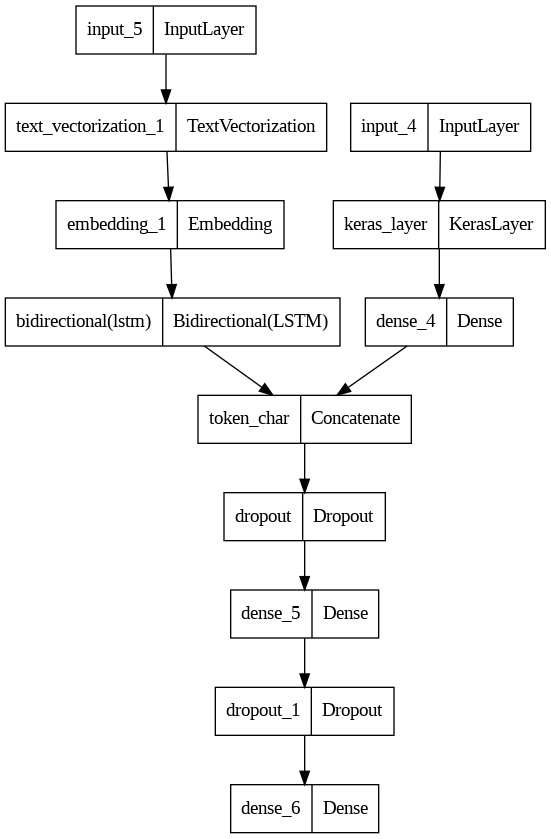

In [ ]:
from keras.utils import plot_model
plot_model(model_4)

In [ ]:
model_4.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.0003), metrics = ["accuracy"])

In [ ]:
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_datasets = tf.data.Dataset.zip((train_token_char_data, train_char_token_labels))

In [ ]:
train_char_token_dataset =train_char_token_datasets.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_datasets = tf.data.Dataset.zip((val_token_char_data, val_char_token_labels))

In [ ]:
val_char_token_dataset =val_char_token_datasets.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_token_char_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_datasets = tf.data.Dataset.zip((test_token_char_data, test_char_token_labels))

In [ ]:
test_char_token_dataset =test_char_token_datasets.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_4 = model_4.fit(test_char_token_dataset, epochs = 3, steps_per_epoch = int(0.1*len(test_char_token_dataset)), validation_data = val_char_token_dataset, validation_steps=  int(0.1*len(val_char_token_dataset)))

Epoch 1/3
94/94 [==============================] - 22s 103ms/step - loss: 1.3160 - accuracy: 0.4335 - val_loss: 1.0512 - val_accuracy: 0.5755
Epoch 2/3
94/94 [==============================] - 11s 114ms/step - loss: 0.9921 - accuracy: 0.5977 - val_loss: 0.8833 - val_accuracy: 0.6443
Epoch 3/3
94/94 [==============================] - 5s 52ms/step - loss: 0.9488 - accuracy: 0.6170 - val_loss: 0.8422 - val_accuracy: 0.6789


In [ ]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)

945/945 [==============================] - 23s 21ms/step


In [ ]:
model_4_preds = tf.argmax(model_4_pred_probs, axis = 1)

In [ ]:
model_4_results = calculate_results(val_labels, model_4_preds)

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth = 15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth = 15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth = 15)

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth = 20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth = 20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth = 20)

In [ ]:
token_inputs = layers.Input(shape = [], dtype = tf.string)
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation = "relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_output)

char_inputs = layers.Input(shape = (1,), dtype = tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embedding)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

line_number_inputs = layers.Input(shape = (15,), dtype = tf.float32)
x = layers.Dense(32, activation = "relu")(line_number_inputs)
line_number_model = tf.keras.Model(line_number_inputs, x)

total_lines_inputs = layers.Input(shape = (20,), dtype = tf.float32)
y = layers.Dense(32, activation = "relu")(total_lines_inputs)
total_line_model = tf.keras.Model(total_lines_inputs, y)

combined_embeddings = layers.Concatenate(name = "token_char")([token_model.output, char_model.output])

z = layers.Dense(256, activation = "relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

tribrid_embeddings = layers.Concatenate()([line_number_model.output, total_line_model.output,z ])

output_layer = layers.Dense(5, activation = "softmax")(tribrid_embeddings)
model_5 = tf.keras.Model(inputs = [token_model.input, char_model.input, line_number_model.input, total_line_model.input], outputs = output_layer)

In [ ]:
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

In [ ]:
train_char_token_pos_data = tf.data.Dataset.from_tensor_slices((train_chars, train_sentences, train_line_numbers_one_hot, train_total_lines_one_hot ))
train_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_data = tf.data.Dataset.zip((train_char_token_pos_data , train_char_token_pos_labels))
train_char_token_pos_data = train_char_token_pos_data.batch(32).prefetch(tf.data.AUTOTUNE)

val_char_token_pos_data = tf.data.Dataset.from_tensor_slices((val_chars, val_sentences, val_line_numbers_one_hot, val_total_lines_one_hot ))
val_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_data = tf.data.Dataset.zip((val_char_token_pos_data , val_char_token_pos_labels))
val_char_token_pos_data = val_char_token_pos_data.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_pos_data = tf.data.Dataset.from_tensor_slices((test_chars, test_sentences, test_line_numbers_one_hot, test_total_lines_one_hot ))
test_char_token_pos_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_char_token_pos_data = tf.data.Dataset.zip((test_char_token_pos_data , test_char_token_pos_labels))
test_char_token_pos_data = test_char_token_pos_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
history_model_5 = model_5.fit(train_char_token_pos_data, steps_per_epoch = 0.1*len(train_char_token_pos_data), epochs = 3, validation_data = val_char_token_pos_data, validation_steps = 0.1*len(val_char_token_pos_data) )

Epoch 1/3
562/562 [==============================] - 43s 58ms/step - loss: 1.0533 - accuracy: 0.7390 - val_loss: 1.0311 - val_accuracy: 0.7566
Epoch 2/3
562/562 [==============================] - 28s 51ms/step - loss: 1.0373 - accuracy: 0.7541 - val_loss: 1.0280 - val_accuracy: 0.7618
Epoch 3/3
562/562 [==============================] - 25s 44ms/step - loss: 1.0320 - accuracy: 0.7551 - val_loss: 1.0219 - val_accuracy: 0.7651


In [ ]:
model_5_pred_probs = model_5.predict(val_char_token_pos_data)

945/945 [==============================] - 25s 24ms/step


In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs, axis = 1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([3, 3, 2, ..., 1, 1, 1])>

In [ ]:
model_5_result = calculate_results(val_labels, model_5_preds)

In [ ]:
model_5_result

{'accuracy': 76.27101813848802,
 'precision': 0.7669486865483397,
 'recall': 0.7627101813848802,
 'f1': 0.7582244104465556}